In [1]:
#using https://www.tensorflow.org/tutorials/keras/classification
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import os
import cv2
import fnmatch

# TensorFlow and tf.keras
import tensorflow as tf
import keras

from keras.preprocessing.image import save_img

from PIL import Image

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
CATEGORIES = ["Top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle-boot"] 

In [3]:

#This breaks the size of everything after being run. after executing this section rerun the one above it.
#Generate tmp test images for outfit recommender part
plt.figure(figsize=(28,28))
for i in range(3000):
    folder = train_labels[i]
    img_name= 'clothes/' + str(CATEGORIES[train_labels[i]]) + '/img'+ str(i) +'.png'
    print(img_name)
    im = train_images[i]
    matplotlib.image.imsave(img_name,im)
plt.show()

clothes/Ankle-boot/img0.png
clothes/Top/img1.png
clothes/Top/img2.png
clothes/Dress/img3.png
clothes/Top/img4.png
clothes/Pullover/img5.png
clothes/Sneaker/img6.png
clothes/Pullover/img7.png
clothes/Sandal/img8.png
clothes/Sandal/img9.png
clothes/Top/img10.png
clothes/Ankle-boot/img11.png
clothes/Sandal/img12.png
clothes/Sandal/img13.png
clothes/Sneaker/img14.png
clothes/Ankle-boot/img15.png
clothes/Trouser/img16.png
clothes/Top/img17.png
clothes/Shirt/img18.png
clothes/Coat/img19.png
clothes/Dress/img20.png
clothes/Trouser/img21.png
clothes/Coat/img22.png
clothes/Bag/img23.png
clothes/Coat/img24.png
clothes/Dress/img25.png
clothes/Top/img26.png
clothes/Pullover/img27.png
clothes/Coat/img28.png
clothes/Coat/img29.png
clothes/Sandal/img30.png
clothes/Dress/img31.png
clothes/Shirt/img32.png
clothes/Shirt/img33.png
clothes/Top/img34.png
clothes/Bag/img35.png
clothes/Sandal/img36.png
clothes/Pullover/img37.png
clothes/Trouser/img38.png
clothes/Shirt/img39.png
clothes/Shirt/img40.png
clothe

clothes/Pullover/img404.png
clothes/Pullover/img405.png
clothes/Sandal/img406.png
clothes/Dress/img407.png
clothes/Bag/img408.png
clothes/Bag/img409.png
clothes/Shirt/img410.png
clothes/Bag/img411.png
clothes/Coat/img412.png
clothes/Coat/img413.png
clothes/Trouser/img414.png
clothes/Top/img415.png
clothes/Pullover/img416.png
clothes/Sneaker/img417.png
clothes/Trouser/img418.png
clothes/Trouser/img419.png
clothes/Bag/img420.png
clothes/Bag/img421.png
clothes/Pullover/img422.png
clothes/Sneaker/img423.png
clothes/Ankle-boot/img424.png
clothes/Sneaker/img425.png
clothes/Coat/img426.png
clothes/Trouser/img427.png
clothes/Pullover/img428.png
clothes/Top/img429.png
clothes/Bag/img430.png
clothes/Ankle-boot/img431.png
clothes/Trouser/img432.png
clothes/Coat/img433.png
clothes/Ankle-boot/img434.png
clothes/Sandal/img435.png
clothes/Shirt/img436.png
clothes/Sneaker/img437.png
clothes/Top/img438.png
clothes/Dress/img439.png
clothes/Pullover/img440.png
clothes/Top/img441.png
clothes/Coat/img442.p

clothes/Sandal/img845.png
clothes/Pullover/img846.png
clothes/Bag/img847.png
clothes/Sneaker/img848.png
clothes/Top/img849.png
clothes/Trouser/img850.png
clothes/Coat/img851.png
clothes/Trouser/img852.png
clothes/Bag/img853.png
clothes/Dress/img854.png
clothes/Pullover/img855.png
clothes/Sneaker/img856.png
clothes/Sandal/img857.png
clothes/Top/img858.png
clothes/Ankle-boot/img859.png
clothes/Shirt/img860.png
clothes/Shirt/img861.png
clothes/Ankle-boot/img862.png
clothes/Dress/img863.png
clothes/Trouser/img864.png
clothes/Trouser/img865.png
clothes/Ankle-boot/img866.png
clothes/Ankle-boot/img867.png
clothes/Dress/img868.png
clothes/Ankle-boot/img869.png
clothes/Sneaker/img870.png
clothes/Dress/img871.png
clothes/Trouser/img872.png
clothes/Ankle-boot/img873.png
clothes/Trouser/img874.png
clothes/Shirt/img875.png
clothes/Dress/img876.png
clothes/Top/img877.png
clothes/Coat/img878.png
clothes/Bag/img879.png
clothes/Top/img880.png
clothes/Shirt/img881.png
clothes/Shirt/img882.png
clothes/Pu

clothes/Sneaker/img1213.png
clothes/Pullover/img1214.png
clothes/Pullover/img1215.png
clothes/Shirt/img1216.png
clothes/Sandal/img1217.png
clothes/Top/img1218.png
clothes/Bag/img1219.png
clothes/Sneaker/img1220.png
clothes/Bag/img1221.png
clothes/Sandal/img1222.png
clothes/Sandal/img1223.png
clothes/Sneaker/img1224.png
clothes/Trouser/img1225.png
clothes/Dress/img1226.png
clothes/Sandal/img1227.png
clothes/Top/img1228.png
clothes/Pullover/img1229.png
clothes/Pullover/img1230.png
clothes/Bag/img1231.png
clothes/Ankle-boot/img1232.png
clothes/Shirt/img1233.png
clothes/Bag/img1234.png
clothes/Sandal/img1235.png
clothes/Shirt/img1236.png
clothes/Ankle-boot/img1237.png
clothes/Sandal/img1238.png
clothes/Sneaker/img1239.png
clothes/Sneaker/img1240.png
clothes/Ankle-boot/img1241.png
clothes/Coat/img1242.png
clothes/Trouser/img1243.png
clothes/Pullover/img1244.png
clothes/Pullover/img1245.png
clothes/Coat/img1246.png
clothes/Sneaker/img1247.png
clothes/Bag/img1248.png
clothes/Dress/img1249.png

clothes/Trouser/img1631.png
clothes/Sneaker/img1632.png
clothes/Pullover/img1633.png
clothes/Top/img1634.png
clothes/Bag/img1635.png
clothes/Dress/img1636.png
clothes/Ankle-boot/img1637.png
clothes/Trouser/img1638.png
clothes/Ankle-boot/img1639.png
clothes/Top/img1640.png
clothes/Pullover/img1641.png
clothes/Shirt/img1642.png
clothes/Trouser/img1643.png
clothes/Bag/img1644.png
clothes/Shirt/img1645.png
clothes/Sandal/img1646.png
clothes/Top/img1647.png
clothes/Coat/img1648.png
clothes/Pullover/img1649.png
clothes/Pullover/img1650.png
clothes/Pullover/img1651.png
clothes/Pullover/img1652.png
clothes/Dress/img1653.png
clothes/Dress/img1654.png
clothes/Coat/img1655.png
clothes/Trouser/img1656.png
clothes/Ankle-boot/img1657.png
clothes/Sandal/img1658.png
clothes/Ankle-boot/img1659.png
clothes/Coat/img1660.png
clothes/Shirt/img1661.png
clothes/Bag/img1662.png
clothes/Ankle-boot/img1663.png
clothes/Dress/img1664.png
clothes/Trouser/img1665.png
clothes/Pullover/img1666.png
clothes/Dress/img16

clothes/Dress/img2026.png
clothes/Top/img2027.png
clothes/Trouser/img2028.png
clothes/Sneaker/img2029.png
clothes/Sandal/img2030.png
clothes/Trouser/img2031.png
clothes/Ankle-boot/img2032.png
clothes/Coat/img2033.png
clothes/Dress/img2034.png
clothes/Trouser/img2035.png
clothes/Dress/img2036.png
clothes/Shirt/img2037.png
clothes/Ankle-boot/img2038.png
clothes/Coat/img2039.png
clothes/Shirt/img2040.png
clothes/Top/img2041.png
clothes/Sandal/img2042.png
clothes/Trouser/img2043.png
clothes/Coat/img2044.png
clothes/Coat/img2045.png
clothes/Ankle-boot/img2046.png
clothes/Sneaker/img2047.png
clothes/Coat/img2048.png
clothes/Top/img2049.png
clothes/Coat/img2050.png
clothes/Dress/img2051.png
clothes/Top/img2052.png
clothes/Coat/img2053.png
clothes/Bag/img2054.png
clothes/Sandal/img2055.png
clothes/Ankle-boot/img2056.png
clothes/Sandal/img2057.png
clothes/Top/img2058.png
clothes/Dress/img2059.png
clothes/Top/img2060.png
clothes/Pullover/img2061.png
clothes/Top/img2062.png
clothes/Bag/img2063.pn

clothes/Pullover/img2429.png
clothes/Bag/img2430.png
clothes/Top/img2431.png
clothes/Sandal/img2432.png
clothes/Shirt/img2433.png
clothes/Pullover/img2434.png
clothes/Ankle-boot/img2435.png
clothes/Coat/img2436.png
clothes/Top/img2437.png
clothes/Trouser/img2438.png
clothes/Top/img2439.png
clothes/Pullover/img2440.png
clothes/Pullover/img2441.png
clothes/Ankle-boot/img2442.png
clothes/Trouser/img2443.png
clothes/Dress/img2444.png
clothes/Sneaker/img2445.png
clothes/Shirt/img2446.png
clothes/Coat/img2447.png
clothes/Sandal/img2448.png
clothes/Ankle-boot/img2449.png
clothes/Sneaker/img2450.png
clothes/Coat/img2451.png
clothes/Sandal/img2452.png
clothes/Shirt/img2453.png
clothes/Pullover/img2454.png
clothes/Bag/img2455.png
clothes/Dress/img2456.png
clothes/Dress/img2457.png
clothes/Sandal/img2458.png
clothes/Top/img2459.png
clothes/Sandal/img2460.png
clothes/Sneaker/img2461.png
clothes/Coat/img2462.png
clothes/Sneaker/img2463.png
clothes/Coat/img2464.png
clothes/Ankle-boot/img2465.png
clo

clothes/Sneaker/img2828.png
clothes/Dress/img2829.png
clothes/Pullover/img2830.png
clothes/Dress/img2831.png
clothes/Top/img2832.png
clothes/Top/img2833.png
clothes/Ankle-boot/img2834.png
clothes/Sneaker/img2835.png
clothes/Ankle-boot/img2836.png
clothes/Bag/img2837.png
clothes/Ankle-boot/img2838.png
clothes/Shirt/img2839.png
clothes/Bag/img2840.png
clothes/Sneaker/img2841.png
clothes/Coat/img2842.png
clothes/Shirt/img2843.png
clothes/Ankle-boot/img2844.png
clothes/Dress/img2845.png
clothes/Ankle-boot/img2846.png
clothes/Shirt/img2847.png
clothes/Dress/img2848.png
clothes/Trouser/img2849.png
clothes/Shirt/img2850.png
clothes/Ankle-boot/img2851.png
clothes/Ankle-boot/img2852.png
clothes/Dress/img2853.png
clothes/Ankle-boot/img2854.png
clothes/Shirt/img2855.png
clothes/Pullover/img2856.png
clothes/Ankle-boot/img2857.png
clothes/Sandal/img2858.png
clothes/Coat/img2859.png
clothes/Coat/img2860.png
clothes/Dress/img2861.png
clothes/Shirt/img2862.png
clothes/Shirt/img2863.png
clothes/Sneaker

<Figure size 2016x2016 with 0 Axes>

In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [5]:
#train_images = train_images.reshape((train_images.shape[0],1,28,28))
#test_images = test_images.reshape((test_images.shape[0],1,28,28))
#Reshape
#train_images = np.array(train_images)
#test_images = np.array(test_images)

train_images = train_images.reshape((train_images.shape[0],1, 28, 28))
test_images = test_images.reshape((test_images.shape[0], 1, 28, 28))
input_shape = (1,28, 28)

#train_images = keras.utils.normalize(train_images, axis=1)
#test_images = keras.utils.normalize(test_images, axis=1)


In [6]:
#model = keras.Sequential([
#    keras.layers.Conv2D(64, (3, 3), input_shape = input_shape),
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dropout(.15),
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Flatten(),
#    keras.layers.Dense(10, activation=tf.nn.softmax) # how many predictions there are
    
    #keras.layers.Conv2D(28, 3, activation = 'sigmoid', padding = 'same', input_shape = (28, 28, 3)),
    #keras.layers.Conv2D(28, 3, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_uniform'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.Conv2D(56, 3, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_uniform'),
    #keras.layers.Conv2D(56, 3, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_uniform'),
    #keras.layers.MaxPooling2D(),
    #keras.layers.Flatten(),
    #keras.layers.Dense(112, activation = 'sigmoid', kernel_initializer = 'he_uniform'),
    #keras.layers.Dense(10, activation = 'softmax')
#])

model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=input_shape)) 
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 28, 64)         7232      
_________________________________________________________________
dropout (Dropout)            (None, 1, 28, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 28, 32)         8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 28, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               229632    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [7]:
model.fit(train_images, train_labels, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 188us/sample - loss: 0.5245 - accuracy: 0.8105
Epoch 2/30
60000/60000 [==============================] - 11s 191us/sample - loss: 0.3797 - accuracy: 0.8617
Epoch 3/30
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3451 - accuracy: 0.8732
Epoch 4/30
60000/60000 [==============================] - 11s 177us/sample - loss: 0.3209 - accuracy: 0.8812
Epoch 5/30
60000/60000 [==============================] - 11s 183us/sample - loss: 0.3048 - accuracy: 0.8869
Epoch 6/30
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2947 - accuracy: 0.8899
Epoch 7/30
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2817 - accuracy: 0.8957
Epoch 8/30
60000/60000 [==============================] - 11s 190us/sample - loss: 0.2715 - accuracy: 0.8995
Epoch 9/30
60000/60000 [==============================] - 11s 175us/sample - loss: 0.2612 - accuracy: 0.9

In [8]:
###save model
#from keras.models import Model, load_model
# save model and architecture to single file
#model.save("model_data/model.h5")
#print("Saved model to disk")

In [9]:
#this shouldn't work. Why did this work? The model was made with keras and not tf.keras
#and yet it is the only way to load it. Kera's load model gives a very uninformative key value error
#model = tf.keras.models.load_model('model_data/model.h5')
# summarize model.
#model.summary()
#it didn't work, i was able to get summery but no prediction was possible

In [15]:
def prepare(filepath):
    #IMG_SIZE = 28
    #img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    im = cv2.imread(filepath, 0)
    im = cv2.resize(im,  (28, 28)) 
    im.reshape((28,28))
    print(im.shape) # (28,28)

    batch = np.expand_dims(im,axis=0)
    print(batch.shape) # (1, 28, 28)
    batch = np.expand_dims(batch,axis=1)
    #print(batch.shape) # (1, 28, 28,1)


    #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    #img = new_array.reshape(1,1, IMG_SIZE, IMG_SIZE)
    #plt.imshow(img)
    return batch


In [16]:
def predict(filepath):
    return model.predict([prepare(filepath)])

In [17]:
def get_counterparts(item):
    counterparts = []
    if(item == 'Top' or item == 'Shirt'):
        counterparts.append('Trouser')
        counterparts.append('Ankle-boot')
    elif(item == 'Dress'):
            counterparts.append('Sandal')
    elif(item == 'Sandal'):
            counterparts.append('Dress')
    elif(item == 'Pullover'):
            counterparts.append('Trousers')
            counterparts.append('Sneaker')
    elif(item == 'Trouser'):
            counterparts.append('Pullover')
            counterparts.append('Sneaker')
    elif(item == 'Sneaker'):
            counterparts.append('Pullover')
            counterparts.append('Trousers')
    return counterparts 

In [18]:
#TODO: Impl unsupervised learner
def recommend(filepath):
    outfit = []
    prediction =  predict(filepath)
    prediction_to_string = CATEGORIES[int(prediction[0][0])]
    print("your input was recognized as a : " + prediction_to_string)
    img_array = cv2.imread(filepath)  # convert to array
    outfit.append(img_array)
    plt.imshow(img_array)  # graph it
    plt.show()  # display!
    print("recommendations : ")
    counterparts = get_counterparts(prediction_to_string)
    for item in counterparts:
        fp = 'clothes/' + item +'/'
        for img in os.listdir(fp):
            suggestion = filepath[-5]
            if fnmatch.fnmatch(img, '*'+suggestion+'*'):
                file_path = fp + img
                print(file_path)
                img_array = cv2.imread(file_path)  # convert to array
                outfit.append(img_array)
                plt.imshow(img_array)  # graph it
                plt.show()  # display!
                break
    return outfit


(28, 28)
(1, 28, 28)
your input was recognized as a : Top


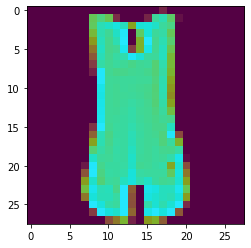

recommendations : 
clothes/Trouser/img2542.png


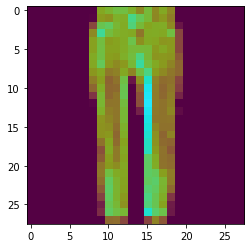

clothes/Ankle-boot/img2224.png


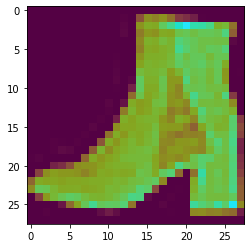

In [20]:
import import_ipynb
import concat
def main():
    filepath = 'clothes/Top/img4.png'   
    outfit = recommend(filepath)
    #concat.concat(outfit, 'suggestedOutfit')
    #cv2.imwrite() 
main()